## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading CSV file

In [2]:
london_weather = pd.read_csv("./london_weather.csv")
london_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Cleaning the data
### Dropping NaN rows

In [3]:
# Running `nan_indf` will output a table of rows with any column filled with NaN
nan_indf = london_weather[london_weather.isna().any(axis=1)]
# Dropping any rows with NaN in all of it's columns
london_weather = london_weather.dropna(how="all")
london_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## Organizing the data
### Adding a month column for comparison

In [4]:
# converting dates from int to strings
london_weather["date"] = london_weather["date"].astype(str)
# grabbing the month
london_weather["Month"] = london_weather["date"].str[4:6]
# converting date back to int
london_weather["Month"] = london_weather["Month"].astype("int32")

### Adding a year column for comparison

In [5]:
london_weather["Year"] = london_weather["date"].str[:4]
# converting date back to int
london_weather["Year"] = london_weather["Year"].astype("int32")
london_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,Month,Year
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1,1979
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1,1979
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1,1979
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1,1979
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1,1979


## Months with the most precipitation

In [6]:
precipitation_per_month = london_weather.groupby("Month")["precipitation"].sum()
precipitation_per_month

Month
1     2405.9
2     1770.0
3     1822.3
4     1786.1
5     2034.9
6     2042.3
7     1892.7
8     2141.8
9     1921.1
10    2853.1
11    2491.0
12    2427.3
Name: precipitation, dtype: float64

### Graphing results

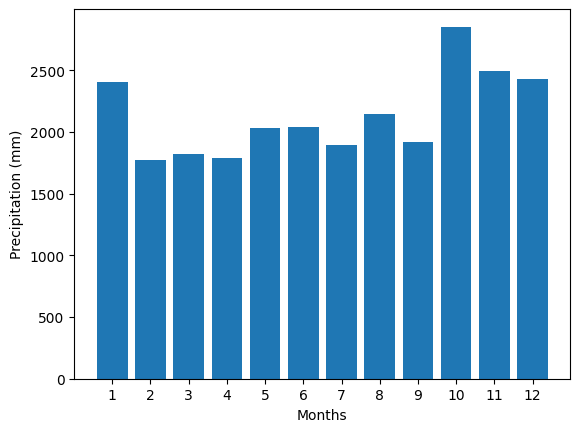

In [7]:
months = range(1,13)
plt.bar(months, precipitation_per_month)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Precipitation (mm)")
plt.show()

## Number of days per year with precipitation

In [8]:
# Referenced from https://stackoverflow.com/questions/33365055/attributeerror-can-only-use-dt-accessor-with-datetimelike-values
# Assuming you have a column named 'precipitation' in your 'london_weather' DataFrame
n_days_no_rain = london_weather[london_weather["precipitation"] == 0.0].groupby(london_weather["Year"])['precipitation'].count()

# Print the count of zero precipitation days by year
print(n_days_no_rain)


Year
1979    179
1980    199
1981    182
1982    183
1983    199
1984    196
1985    193
1986    178
1987    187
1988    196
1989    212
1990    229
1991    214
1992    194
1993    201
1994    174
1995    216
1996    215
1997    216
1998    178
1999    176
2000    171
2001    180
2002    177
2003    212
2004    188
2005    182
2006    171
2007    176
2008    166
2009    175
2010    190
2011    198
2012    176
2013    178
2014    158
2015    181
2016    193
2017    193
2018    210
2019    197
2020    174
Name: precipitation, dtype: int64


### Graphing results

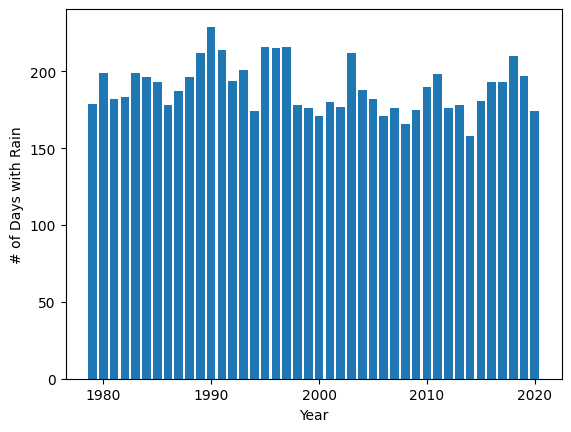

In [9]:
years = range(1979, 2021)
plt.bar(years, n_days_no_rain)
plt.xlabel("Year")
plt.ylabel("# of Days with Rain")
plt.show()

## Progression of daily average temperature

In [10]:
# Dropping all rows with any NaN in "mean_temp" column, and outputting result
daily_avg_temp = pd.to_numeric(london_weather["mean_temp"], errors="coerce")
daily_avg_temp = daily_avg_temp.dropna()
daily_avg_temp

0       -4.1
1       -2.6
2       -2.8
3       -2.6
4       -0.8
        ... 
15336    7.5
15337    1.1
15338    2.6
15339    2.7
15340   -0.8
Name: mean_temp, Length: 15305, dtype: float64

### Graphing results

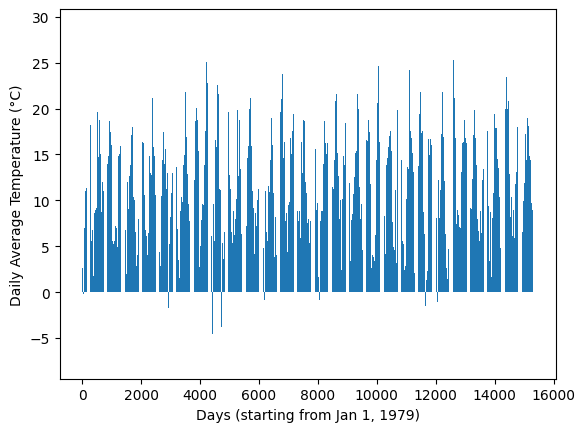

In [11]:
years = range(0, 15305)
plt.bar(years, daily_avg_temp)
plt.xlabel("Days (starting from Jan 1, 1979)")
plt.ylabel("Daily Average Temperature (°C)")
plt.show()